In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,drop_first="true")
dataset=dataset.replace({True:1,False:0})
dataset

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_17304\1697040933.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset=dataset.replace({True:1,False:0})


,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
X_train,X_test,Y_train,Y_test

(      age     bmi  children  sex_male  smoker_yes
 1163   18  28.215         0         0           0
 196    39  32.800         0         0           0
 438    52  46.750         5         0           0
 183    44  26.410         0         0           0
 1298   33  27.455         2         1           0
 ...   ...     ...       ...       ...         ...
 763    27  26.030         0         1           0
 835    42  35.970         2         1           0
 1216   40  25.080         0         1           0
 559    19  35.530         0         1           0
 684    33  18.500         1         0           0
 
 [936 rows x 5 columns],
       age     bmi  children  sex_male  smoker_yes
 578    52  30.200         1         1           0
 610    47  29.370         1         0           0
 569    48  40.565         2         1           1
 1034   61  38.380         0         1           0
 198    51  18.050         0         0           0
 ...   ...     ...       ...       ...         ...
 126

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="poisson",splitter="best")
regressor=regressor.fit(X_train,Y_train)
regressor

DecisionTreeRegressor(criterion='poisson')

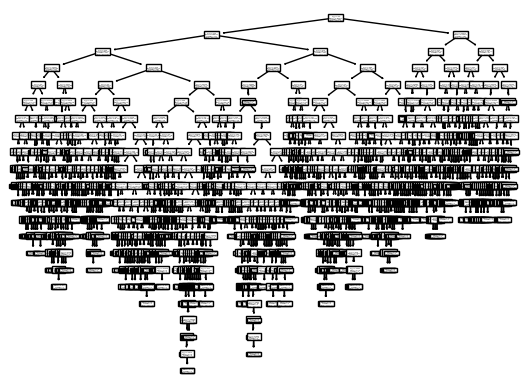

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [44]:
y_pred=regressor.predict(X_test)
y_pred

array([ 9625.92    ,  8930.93455 , 44202.6536  , 13143.86485 ,
        9264.797   , 21984.47061 ,  1615.7667  , 10381.4787  ,
        7954.517   ,  5253.524   ,  4766.022   , 30284.64294 ,
        7345.7266  ,  4992.3764  , 18246.4955  , 10264.4421  ,
       12142.5786  ,  3292.52985 ,  6455.86265 , 33307.5508  ,
       24667.419   , 11987.1682  ,  9625.92    , 24915.22085 ,
        3443.064   ,  4151.0287  ,  3161.454   ,  8538.28845 ,
        3353.284   ,  8116.26885 ,  7954.517   , 48673.5588  ,
       13981.85035 , 10713.644   , 16115.3045  ,  3554.203   ,
        8978.1851  , 44585.45587 , 40941.2854  ,  1880.07    ,
       21984.47061 ,  2866.091   , 21082.16    , 44641.1974  ,
       35585.576   ,  2801.2588  , 11015.1747  ,  6272.4772  ,
        4719.52405 , 11830.6072  ,  2473.3341  ,  2639.0429  ,
       24915.22085 , 60021.39897 , 11856.4115  ,  2689.4954  ,
        3201.24515 ,  8442.667   ,  7726.854   , 12913.9924  ,
        1252.407   , 46130.5265  , 14590.63205 , 25333.

In [45]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)
r_score

0.7170005084117272

In [46]:
import pickle
filename="finalized_model_decision_tree.sav"
pickle.dump(regressor, open(filename,'wb'))

In [48]:
loaded_model=pickle.load(open("finalized_model_decision_tree.sav",'rb'))
result=loaded_model.predict([[21,1.253,0,0.12,1.86]])
result

C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([13747.87235])